### Seeding for reproducibility

In [1]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

### Importing the dependencies

In [2]:
from tensorflow import keras
from keras import datasets, layers, models
from matplotlib import pyplot as plt

### Loading the data

In [3]:
# Load and prepare the Fashion MNIST dataset
fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


### Data Processing

In [4]:
# datatype
type(train_images)

numpy.ndarray

In [5]:
type(train_labels)

numpy.ndarray

In [6]:
print(len(train_images))

60000


In [7]:
print(len(train_labels))

60000


In [8]:
print(len(test_images))

10000


In [9]:
print(train_images[0].shape)

(28, 28)


In [11]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

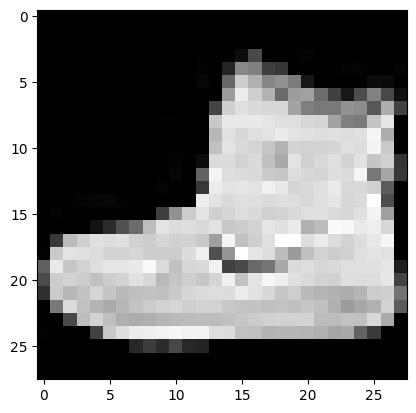

In [12]:
# Display an image from the dataset

plt.imshow(train_images[0], cmap='gray')
plt.show()

In [13]:
print(train_labels[0])

9


**class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']**

### Normalizing the pixel values

In [14]:
# Normalize pixel values to be between 0 and 1

train_images, test_images = train_images / 255.0, test_images / 255.0

In [15]:
print(train_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [17]:
train_images.shape

(60000, 28, 28, 1)

In [18]:
# Reshape images to specify that it's a single channel (grayscale)

train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [19]:
train_images.shape

(60000, 28, 28, 1)

In [20]:
test_images.shape

(10000, 28, 28, 1)

### Convolutional Neural Network

In [25]:
# Build the convolutional base
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [26]:
# Compiling the model

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
# training the model

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 67s 35ms/step - loss: 0.4932 - accuracy: 0.8212 - val_loss: 0.3748 - val_accuracy: 0.8679
Epoch 2/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.3265 - accuracy: 0.8810 - val_loss: 0.3263 - val_accuracy: 0.8842
Epoch 3/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.2786 - accuracy: 0.8983 - val_loss: 0.3087 - val_accuracy: 0.8899
Epoch 4/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.2456 - accuracy: 0.9081 - val_loss: 0.2730 - val_accuracy: 0.9029
Epoch 5/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.2234 - accuracy: 0.9175 - val_loss: 0.2884 - val_accuracy: 0.9007
Epoch 6/10
1875/1875 [==============================] - 84s 45ms/step - loss: 0.2023 - accuracy: 0.9253 - val_loss: 0.2702 - val_accuracy: 0.9047
Epoch 7/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.1852 - accuracy: 0.9306 - val_loss: 0.2756 -

In [28]:
# evaluating the model
loss, accuracy = model.evaluate(test_images, test_labels)
print('Accuracy:', accuracy)

313/313 [==============================] - 4s 14ms/step - loss: 0.2786 - accuracy: 0.9125
Accuracy: 0.9125000238418579


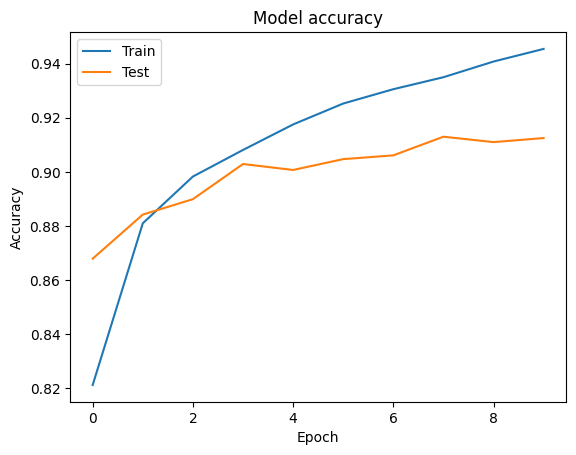

In [29]:
# Plot of training & validation accuracy values

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

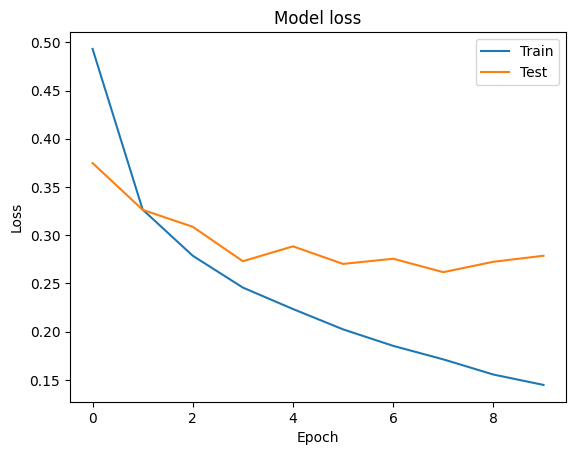

In [31]:
# Plot of training & validation loss values

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [32]:
# saving the model

model.save('trained_fashion_mnist_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
